# Simple

In [259]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score


%matplotlib inline

In [253]:
df = pd.read_csv('simple.csv', sep=';')
df = df[['base', 'rate', 'fee']]
df = df.replace(regex=[','],value='.')
df = df.dropna()

df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['rate'] = pd.to_numeric(df['rate'])

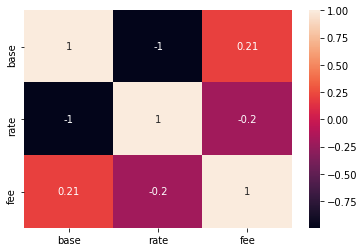

In [254]:
sns.heatmap(df.corr(), annot=True);

In [255]:
X = np.array(df[['base', 'rate']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [258]:
def formula2(x0='base', x1='rate', X=df[['base','rate']], y=df['fee']):
    pol = PolynomialFeatures(degree=3)
    X_pol = pol.fit_transform(X)
    lasso1 = Lasso(alpha=lassocv1.alpha_, normalize=True)
    lasso1.fit(X_pol, y)
    coeffs1 = lasso1.coef_

    coef_list_important=[]
    for i in range(len(lasso1.coef_)):
        if abs(lasso1.coef_[i])!=0:
            coef_list_important.append(i)
        
    coef_list = ['1', x0, x1, x0+'^2', x0+' * '+x1, x1+'^2', x0+'^3', x0+'^2'+x1, x0+' * '+x1+'^2', x1+'^3']
    string_result = ''
    for coef_imp in coef_list_important:
        print('coef imp', coef_imp)
        print(model.steps[1][1].coef_[coef_imp],'*',coef_list[coef_imp])
        #string_result += str(model.steps[1][1].coef_[coef_imp]),'*',str(coef_list[coef_imp])
        
formula2()

coef imp 4
-1.14602577563773e-08 * base * rate


In [174]:
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# regression
x = df[['base', 'rate']].values
y = df['fee']
poly = PolynomialFeatures(3)
linr = LinearRegression()
model = make_pipeline(poly, linr)
model.fit(x, y)
print(model.steps[1][1].coef_)
print(model.steps[0][1].get_feature_names())
coef = model.steps[1][1].coef_
print(np.around(coef, 3))

[ 0.00000000e+00  1.91334909e-04  9.56981125e-03 -3.34794560e-08
  9.90186422e-03  2.93679589e-02  1.55357191e-12  9.42681246e-09
  1.18566140e-05 -6.38056534e-03]
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']
[ 0.     0.     0.01  -0.     0.01   0.029  0.     0.     0.    -0.006]


In [120]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [129]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 3
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  22.32713995694523
rmse_poly2 =  0.002721737117209832
rmse_poly3 =  0.002714235083325619
rmse_poly4 =  0.0037998612895823822
rmse random forest =  1.3351976156304406


# With reference

In [230]:
df = pd.read_csv('reference.1.csv', sep=';')
df = df[['base', 'rate ID', 'period start', 'period end', 'fee']]
df['period start'] = pd.to_datetime(df['period start'], format="%d/%m/%Y")
df['period end'] = pd.to_datetime(df['period end'], format="%d/%m/%Y")
df['days_diff'] = (df['period end'] - df['period start']).dt.days
df['end_day'] = df['period end'].dt.day
df['start_day'] = df['period start'].dt.day
df['end_month'] = df['period end'].dt.month
df['start_month'] = df['period start'].dt.month

df.head()

,base,rate ID,period start,period end,fee,days_diff,end_day,start_day,end_month,start_month
0,"0,00",313d1da6-b871-4c3c-893b-54bd1c5b8cec,2021-02-17,2021-10-14,"0,00",239.0,14.0,17.0,10.0,2.0
1,"4587,00",f1d64162-1af0-4f79-b9a3-f5247ea07809,2021-07-13,2021-08-19,"8,37",37.0,19.0,13.0,8.0,7.0
2,"470,00",313d1da6-b871-4c3c-893b-54bd1c5b8cec,2021-09-05,2021-11-23,"3,05",79.0,23.0,5.0,11.0,9.0
3,"9347,00",240ee602-ad4f-4792-8ca8-ab813a2ea6b3,2021-05-20,2021-09-13,"8,91",116.0,13.0,20.0,9.0,5.0
4,"8310,00",1e760cd7-30f5-4e7b-a77e-3e678116a82a,2021-01-13,2021-01-31,"2,46",18.0,31.0,13.0,1.0,1.0


In [231]:
df2 = pd.read_csv('reference.2.csv', sep=';')
df2 = df2[['ID', 'Rate']]
dic_id_rate = {}
for ind in df2.index:
    rate_id = df2.loc[ind, 'ID']
    rate = df2.loc[ind, 'Rate']
    dic_id_rate[rate_id] = rate
df2.head()

,ID,Rate
0,313d1da6-b871-4c3c-893b-54bd1c5b8cec,"3,00"
1,5a3eb9fa-f7b5-4e44-8506-c4359050f980,"2,70"
2,1f1f54f1-6263-496c-9dbf-72fa5deef60f,"2,40"
3,2e88dfaa-e4ae-438b-90b3-b9af1e99e789,"2,10"
4,f1d64162-1af0-4f79-b9a3-f5247ea07809,"1,80"


In [232]:
df = df.replace({"rate ID": dic_id_rate})
df['rate'] = df['rate ID']
df = df.drop(['rate ID'], axis=1)

In [233]:
df = df.replace(regex=[','],value='.')

In [234]:
df = df.dropna()

In [235]:
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['rate'] = pd.to_numeric(df['rate'])
df['days_diff'] = pd.to_numeric(df['days_diff'])

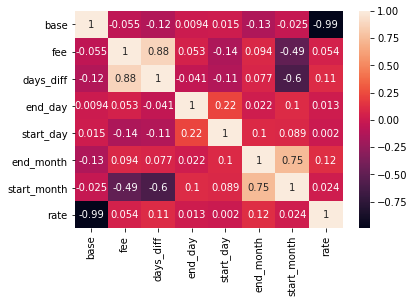

In [236]:
sns.heatmap(df.corr(), annot=True);

In [237]:
df.head()

,base,period start,period end,fee,days_diff,end_day,start_day,end_month,start_month,rate
0,0.0,2021-02-17,2021-10-14,0.00,239.0,14.0,17.0,10.0,2.0,3.0
1,4587.0,2021-07-13,2021-08-19,8.37,37.0,19.0,13.0,8.0,7.0,1.8
2,470.0,2021-09-05,2021-11-23,3.05,79.0,23.0,5.0,11.0,9.0,3.0
3,9347.0,2021-05-20,2021-09-13,8.91,116.0,13.0,20.0,9.0,5.0,0.3
4,8310.0,2021-01-13,2021-01-31,2.46,18.0,31.0,13.0,1.0,1.0,0.6


In [238]:
X = np.array(df[['base', 'days_diff','rate', 'end_day']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [239]:

# regression
x = df[['base', 'rate', 'days_diff']].values
y = df['fee']
poly = PolynomialFeatures(3)
linr = LinearRegression()
model = make_pipeline(poly, linr)
model.fit(x, y)

print(model.steps[0][1].get_feature_names())
coef = model.steps[1][1].coef_
print(np.around(coef, 3))

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3']
[ 0.     0.     0.02   0.014 -0.    -0.    -0.     0.063 -0.009 -0.
  0.     0.     0.    -0.     0.     0.    -0.014  0.001  0.    -0.   ]


In [240]:
from sklearn.linear_model import LassoCV, Lasso, LinearRegression, RidgeCV, Ridge
from joblib import parallel_backend

y = df['fee']
X = df[['base','rate', 'days_diff']]

pol = PolynomialFeatures(degree=3)
X_pol = pol.fit_transform(X)
lasso1 = Lasso(alpha=lassocv1.alpha_, normalize=True)
lasso1.fit(X_pol, y)
coeffs1 = lasso1.coef_

index_list=[]
for i in range(len(lasso1.coef_)):
    if abs(lasso1.coef_[i])!=0:
        index_list.append(i)
        
index_list

[14]

In [241]:
def formula3(x0='base', x1='rate', x2='days_diff', X=df[['base','rate', 'days_diff']], y=df['fee']):
    pol = PolynomialFeatures(degree=3)
    X_pol = pol.fit_transform(X)
    lasso1 = Lasso(alpha=lassocv1.alpha_, normalize=True)
    lasso1.fit(X_pol, y)
    coeffs1 = lasso1.coef_

    coef_list_important=[]
    for i in range(len(lasso1.coef_)):
        if abs(lasso1.coef_[i])!=0:
            coef_list_important.append(i)
        
    model.steps[1][1].coef_[14]
    coef_list = ['1', x0, x1, x2, x0+'^2', x0+' * '+x1, x0+' * '+x2, x1+'^2',
                 x1+' * '+x2, x2+'^2', x0+'^3', x0+'^2'+' * '+x1,
                 x0+'^2'+' * '+x2, x0+' * '+x1+'^2', x0+' * '+x1+' * '+x2,
                 x0+' * '+x2+'^2', x1+'^3', x1+'^2'+' * '+x2, x1+' * '+x2+'^2', x2+'^3']
    for coef_imp in coef_list_important:
        print(model.steps[1][1].coef_[coef_imp],'*',coef_list[coef_imp])
formula3()

2.824099312348321e-05 * base * rate * days_diff


In [202]:
model.steps[1][1].coef_[14]

2.824099312348321e-05

In [199]:
1/(365*100)

2.7397260273972603e-05

In [ ]:
def formula()

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [139]:
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
poly4 = PolynomialFeatures(degree=4)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 3
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  5.647233282192135
rmse_poly2 =  5.388952961091334
rmse_poly3 =  0.0034738985275037985
rmse_poly4 =  0.020695358136442594
rmse random forest =  5.218730047431021


# With Lookup

In [102]:
df = pd.read_csv('with_lookup.csv', sep=';')
df['period start'] = pd.to_datetime(df['period start'], format="%d/%m/%Y")
df['period end'] = pd.to_datetime(df['period end'], format="%d/%m/%Y")

df = df[['base', 'period start', 'period end', 'fee']]
df = df.replace(regex=[','],value='.')
df = df.dropna()
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['days_diff'] = (df['period end'] - df['period start']).dt.days
df.head()

,base,period start,period end,fee,days_diff
0,0.0,2021-02-17,2021-10-14,0.00,239
1,4587.0,2021-07-13,2021-08-19,8.37,37
2,470.0,2021-09-05,2021-11-23,3.05,79
3,9347.0,2021-05-20,2021-09-13,8.91,116
4,8310.0,2021-01-13,2021-01-31,2.46,18


In [103]:
df2 = pd.read_csv('with_lookup_rates.csv', sep=';')
df2 = df2[['Lower limit', 'Upper limit', 'Rate']]
df2 = df2.replace(regex=[','],value='.')
df2 = df2.dropna()
df2['Lower limit'] = pd.to_numeric(df2['Lower limit'])
df2['Upper limit'] = pd.to_numeric(df2['Upper limit'])
df2.head()

,Lower limit,Upper limit,Rate
0,0.0,1000.0,3.00
1,1000.0,2000.0,2.70
2,2000.0,3000.0,2.40
3,3000.0,4000.0,2.10
4,4000.0,5000.0,1.80


In [104]:
df['rate'] = df['base']

In [105]:
df.rate = df.rate//1000*1000

In [106]:
dic_id_lower_rate = {}
for ind in df2.index:
    lower_limit = df2.loc[ind, 'Lower limit']
    rate = df2.loc[ind, 'Rate']
    dic_id_lower_rate[lower_limit] = rate
df2.head()

,Lower limit,Upper limit,Rate
0,0.0,1000.0,3.00
1,1000.0,2000.0,2.70
2,2000.0,3000.0,2.40
3,3000.0,4000.0,2.10
4,4000.0,5000.0,1.80


In [107]:
df = df.replace({"rate": dic_id_lower_rate})

In [110]:
df['rate'] = pd.to_numeric(df['rate'])

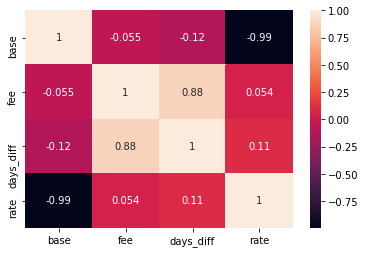

In [111]:
sns.heatmap(df.corr(), annot=True);

In [112]:
X = np.array(df[['base', 'days_diff', 'rate']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [113]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X)
X = scaler.transform(X)

In [114]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 5
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  6.205596131732467
rmse_poly2 =  4.864213036811808
rmse_poly3 =  0.003267954775953299
rmse_poly4 =  0.0058783053736109914
rmse random forest =  4.341916274883638


# With period

In [69]:
df = pd.read_csv('with_period.csv', sep=';')
df['period start'] = pd.to_datetime(df['period start'], format="%d/%m/%Y")
df['period end'] = pd.to_datetime(df['period end'], format="%d/%m/%Y")
df = df[['base', 'rate', 'period start', 'period end', 'fee']]
df = df.replace(regex=[','],value='.')
df = df.dropna()
df['base'] = pd.to_numeric(df['base'])
df['fee'] = pd.to_numeric(df['fee'])
df['rate'] = pd.to_numeric(df['rate'])
df['days_diff'] = (df['period end'] - df['period start']).dt.days
df.head()

,base,rate,period start,period end,fee,days_diff
0,0.0,3.0,2021-02-17,2021-10-14,0.00,239
1,4587.0,1.8,2021-07-13,2021-08-19,8.37,37
2,470.0,3.0,2021-09-05,2021-11-23,3.05,79
3,9347.0,0.3,2021-05-20,2021-09-13,8.91,116
4,8310.0,0.6,2021-01-13,2021-01-31,2.46,18


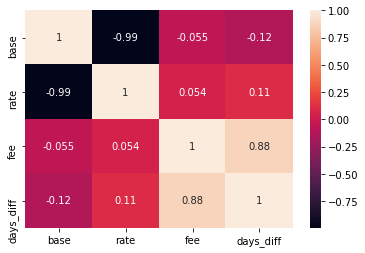

In [70]:
sns.heatmap(df.corr(), annot=True);

In [71]:
X = np.array(df[['base', 'rate', 'days_diff']])

y = np.array(df['fee'])
y = pd.to_numeric(y)

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [73]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
poly4 = PolynomialFeatures(degree=4, include_bias=True)

rmse_linear = 0
rmse_poly2 = 0
rmse_poly3 = 0
rmse_poly4 = 0
rmse_random_forest = 0

k_folds = 5
for fold in range(k_folds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20)
    poly_features_train2 = poly2.fit_transform(X_train)
    poly_features_test2 = poly2.fit_transform(X_test)
    poly_features_train3 = poly3.fit_transform(X_train)
    poly_features_test3 = poly3.fit_transform(X_test)
    poly_features_train4 = poly4.fit_transform(X_train)
    poly_features_test4 = poly4.fit_transform(X_test)
    poly_reg_model2 = LinearRegression()
    poly_reg_model2.fit(poly_features_train2, y_train)
    poly_reg_model3 = LinearRegression()
    poly_reg_model3.fit(poly_features_train3, y_train)
    poly_reg_model4 = LinearRegression()
    poly_reg_model4.fit(poly_features_train4, y_train)
    
    y_pred2 = poly_reg_model2.predict(poly_features_test2)
    rmse_poly2 += mean_squared_error(y_test, y_pred2, squared=False)
    
    y_pred3 = poly_reg_model3.predict(poly_features_test3)
    rmse_poly3 += mean_squared_error(y_test, y_pred3, squared=False)

    y_pred4 = poly_reg_model4.predict(poly_features_test4)
    rmse_poly4 += mean_squared_error(y_test, y_pred4, squared=False)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_linear += mean_squared_error(y_test, y_pred, squared=False)
    
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    y_pred_rf = reg_rf.predict(X_test)
    rmse_random_forest += mean_squared_error(y_test, y_pred_rf, squared=False)
    
print('rmse_linear = ', rmse_linear/k_folds)
print('rmse_poly2 = ', rmse_poly2/k_folds)
print('rmse_poly3 = ', rmse_poly3/k_folds)
print('rmse_poly4 = ', rmse_poly4/k_folds)
print('rmse random forest = ', rmse_random_forest/k_folds)

rmse_linear =  7.246391314821172
rmse_poly2 =  6.3903938789824215
rmse_poly3 =  0.003521971075640245
rmse_poly4 =  0.011994904457639972
rmse random forest =  4.80601124392939


# New data

In [261]:
df = pd.read_csv('with_reference_vector.csv', sep=';')
df = df[[base, ]]
df.head()

,base,rate vector ID,period start,period end,fee,Unnamed: 5
0,"3,00",10153478-ff3d-49f3-a2c5-f7e58a6f5310,18/03/2021,08/05/2021,"0,01",NaN
1,"6768,00",ca2e53bf-602e-42e0-b6b8-dad432bed331,18/01/2021,20/01/2021,"0,45",NaN
2,"5054,00",a58929ef-5e39-4479-adcc-ba3b6d676d9f,21/09/2021,04/12/2021,"15,37",NaN
3,"9102,00",b0f899e6-4097-4284-8b00-aac0c6d80364,10/04/2021,21/09/2021,"12,27",NaN
4,"5909,00",a58929ef-5e39-4479-adcc-ba3b6d676d9f,08/02/2021,27/09/2021,"56,10",NaN
